In [2]:
import torch
import torch.nn as nn

import pandas
import matplotlib.pyplot as plt
import random

In [3]:
def generate_real():
    real_data = torch.FloatTensor(
        [random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2),
         random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2)])
    return real_data

generate_real()

tensor([0.8156, 0.1209, 0.9491, 0.0606])

In [4]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(4, 3),
            nn.Sigmoid(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )
        
        self.loss_function = nn.MSELoss()
        
        self.optimizer = torch.optim.SGD(self.parameters(), lr = 0.01)
        
        self.counter = 0
        self.progress = []
        
    def forward(self, inputs):
        return self.model(inputs)

    def train(self, inputs, targets):
        outputs = self.forward(inputs)
    
        loss = self.loss_function(outputs, targets)
    
        self.counter += 1
    
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
        if self.counter % 1000 == 0:
            print("counter = ", self.counter)
    
        self.optimizer.zero_grad()
    
        loss.backward()
        self.optimizer.step()
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))

In [5]:
def gen_random(size):
    return torch.rand(size)

counter =  1000
counter =  2000
counter =  3000
counter =  4000
counter =  5000
counter =  6000
counter =  7000
counter =  8000
counter =  9000
counter =  10000
counter =  11000
counter =  12000
counter =  13000
counter =  14000
counter =  15000
counter =  16000
counter =  17000
counter =  18000
counter =  19000
counter =  20000


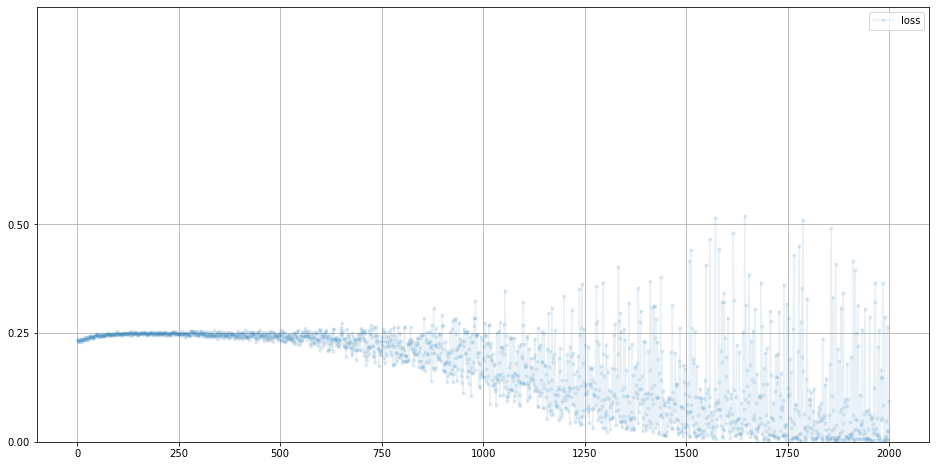

In [6]:
D = Discriminator()
for i in range(10000):
    
    #real data
    D.train(generate_real(), torch.FloatTensor([1.0]))
    
    #fake data
    D.train(gen_random(4), torch.FloatTensor([0.0]))

D.plot_progress()
    

In [7]:
print(D.forward(generate_real()).item())

print(D.forward(gen_random(4)).item())

0.7816824316978455
0.28244179487228394


In [8]:
class Generator(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(1, 3),
            nn.Sigmoid(),
            nn.Linear(3, 4),
            nn.Sigmoid()
        )
        
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
        
        self.counter = 0
        self.progress = []
        
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)
        
        d_output = D.forward(g_output)
        
        loss = D.loss_function(d_output, targets)
        
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
            
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))

In [9]:
D = Discriminator()
G = Generator()
image_list = []

for i in range(10000):
    #train on "true"
    D.train(generate_real(), torch.FloatTensor([1.0]))
    
    #train on "false"
    D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))
    
    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))
    
    if i%1000 == 0:
        image_list.append(G.forward(torch.FloatTensor([0.5])).detach().numpy())

counter =  1000
counter =  2000
counter =  3000
counter =  4000
counter =  5000
counter =  6000
counter =  7000
counter =  8000
counter =  9000
counter =  10000
counter =  11000
counter =  12000
counter =  13000
counter =  14000
counter =  15000
counter =  16000
counter =  17000
counter =  18000
counter =  19000
counter =  20000


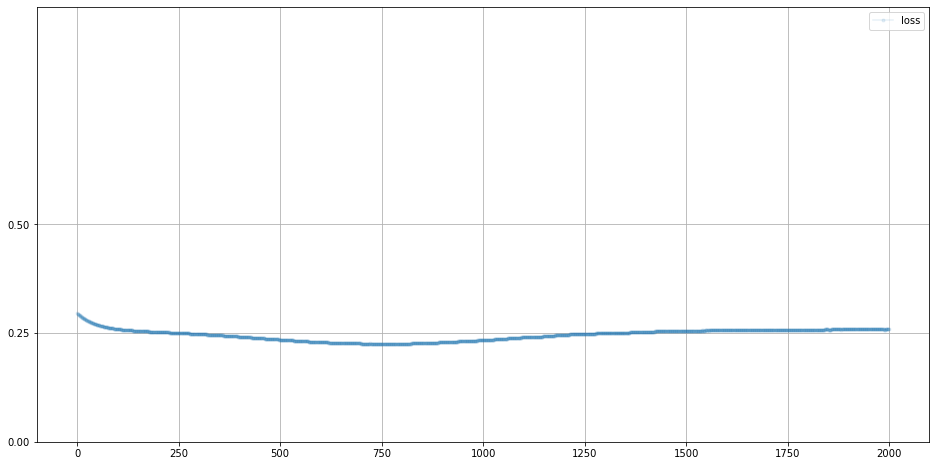

In [10]:
D.plot_progress()

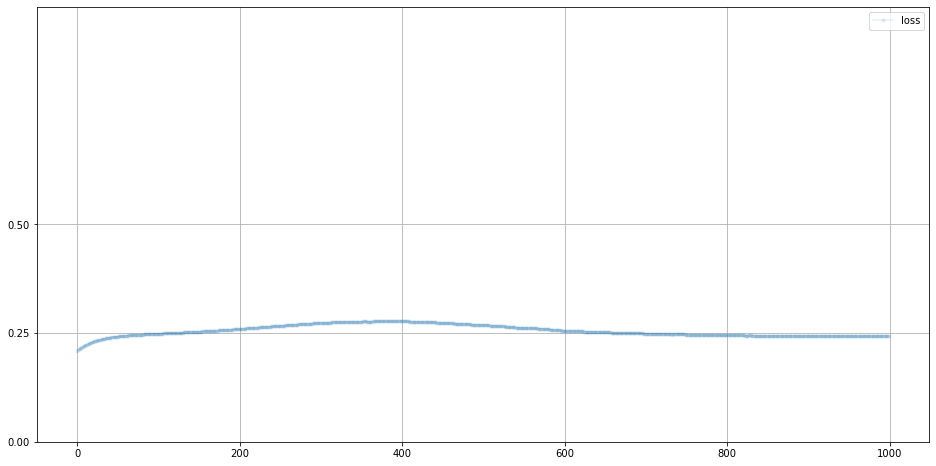

In [11]:
G.plot_progress()

In [12]:
G.forward(torch.FloatTensor([0.5]))

tensor([0.9574, 0.0516, 0.9317, 0.0499], grad_fn=<SigmoidBackward0>)

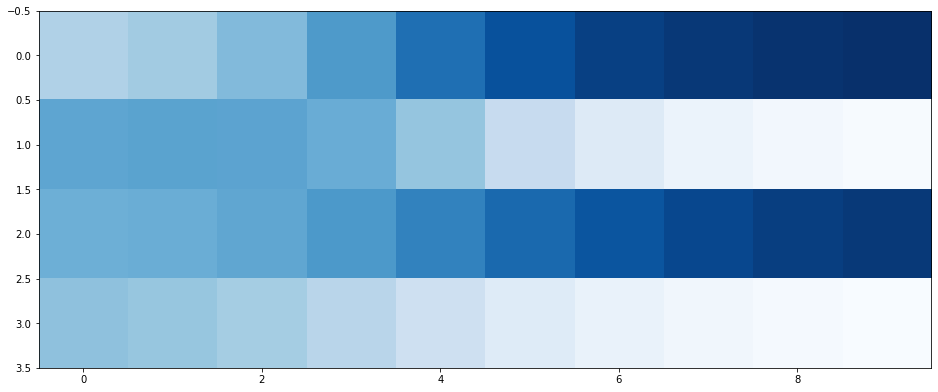

In [13]:
import numpy
plt.figure(figsize=(16,8))

plt.imshow(numpy.array(image_list).T, interpolation='none', cmap='Blues')